In [1]:
import xgboost

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import scipy

In [3]:
import pandas

In [4]:
import matplotlib

In [5]:
%matplotlib inline

In [6]:
z1nepfilename = '../ZInEP_TP2_PP_NPs_SP_sets.csv'
panda = pandas.read_csv(z1nepfilename, na_values=['-999','NaN',' '],sep=",",decimal='.')

In [7]:
panda = panda.fillna(panda.mean())

preservedCols = ['TrainingTest', 'Risikogruppe2', 'PSYCHPATH']
panda = panda.apply(lambda x : [(elem - x.mean())/x.var() for elem in x] if x.name not in preservedCols else x)

In [8]:
trainingData = panda[panda.TrainingTest == 0]

In [9]:
testData = panda[panda.TrainingTest == 1]

In [10]:
filteredTraining = trainingData.iloc[:,16:]#the first 16 columns are confounds, not using them for now
filteredTest = testData.iloc[:,16:]

In [11]:
trainMatrix = xgboost.DMatrix(filteredTraining, label=trainingData.Risikogruppe2)

In [12]:
param = {'max_depth':4, 'silent':0, 'objective':'reg:linear' }
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [13]:
bst = xgboost.train(param, trainMatrix)

In [14]:
testMatrix = xgboost.DMatrix(filteredTest)
yPred = bst.predict(testMatrix)

In [15]:
pred = [round(elem) for elem in yPred]

In [16]:
min(pred)

0.0

In [17]:
sumOfAbsErrors = sum([abs(diff) for diff in pred - testData.Risikogruppe2])

In [18]:
sumOfAbsErrors

43.0

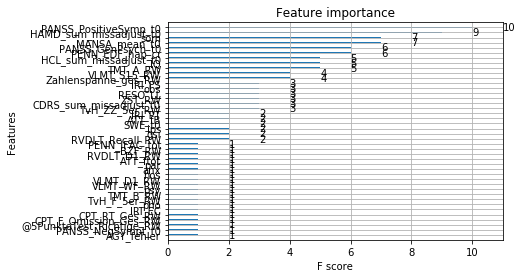

In [19]:
plot = xgboost.plot_importance(bst)

In [20]:
bst.get_fscore()

{'@5PunkteTest_Richtige_RW': 1,
 'AGY_fehler': 1,
 'ATT_fB': 2,
 'ATT_ftot': 1,
 'BZF_RW': 1,
 'CDRS_sum_missadjust_t0': 3,
 'CPT_F_Omission_Ges_RW': 1,
 'CPT_RT_Ges_RW': 1,
 'HAMD_sum_missadjust_t0': 9,
 'HCL_sum_missadjust_t0': 5,
 'IQ': 5,
 'IRI_EC': 1,
 'IRI_FS': 3,
 'IRI_PT': 2,
 'MANSA_mean_t0': 7,
 'PANSS_GenPsych_t0': 6,
 'PANSS_NegSympt_t0': 1,
 'PANSS_PositiveSymp_t0': 10,
 'PENN_EDF_hap_cr': 6,
 'PENN_IFAC_tot': 1,
 'RESO_LL': 3,
 'RVDLT_D1_RW': 1,
 'RVDLT_Recall_RW': 2,
 'SWE_t0': 2,
 'TMT_A_RW': 5,
 'TMT_B_RW': 1,
 'TvH_F_5er_RW': 1,
 'TvH_ZZ_5er_RW': 3,
 'VLMT_D1_RW': 1,
 'VLMT_S15_RW': 4,
 'VLMT_WF_RW': 1,
 'ZST_RW': 3,
 'Zahlenspanne_ges_RW': 4,
 'anx': 1,
 'gsi': 2,
 'hos': 1,
 'ips': 2,
 'obs': 3,
 'par': 1,
 'pho': 1,
 'psy': 1,
 'som': 7}